<a href="https://colab.research.google.com/github/AmrElsayed14/Data-Science-projects/blob/main/EDA_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install Pandas data-reader
!pip install pandas-datareader
!pip install yfinance --upgrade --no-cache-dir

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf
yf.pdr_override()

In [4]:
# Load Tesla dataset from yahoo finance
df_tesla = pdr.data.get_data_yahoo('TSLA')

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

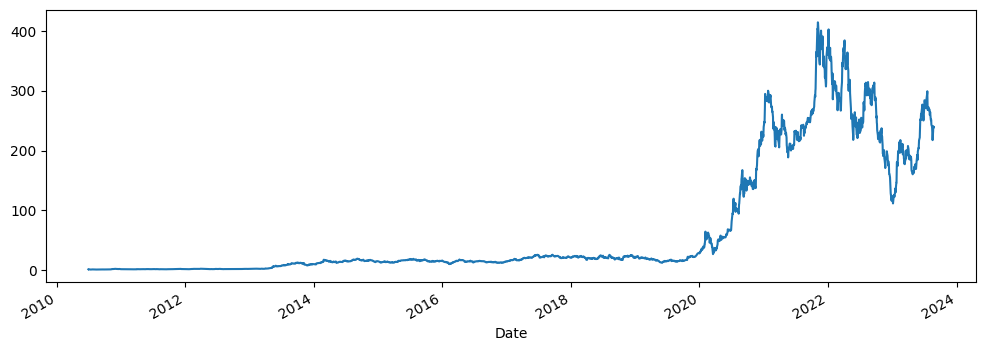

In [5]:
df_tesla['High'].plot(figsize=(12,4))

In [6]:
df_tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3.313000e+03
mean,65.973866,67.445221,64.379553,65.949201,65.949201,9.620029e+07
std,98.884968,101.123963,96.397595,98.791644,98.791644,8.094747e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.986667,10.228667,9.750000,9.957333,9.957333,4.510500e+07
50%,16.680000,16.933332,16.440666,16.694000,16.694000,7.944720e+07
75%,54.811333,55.639999,53.591999,54.370667,54.370667,1.226595e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


<Axes: xlabel='Date'>

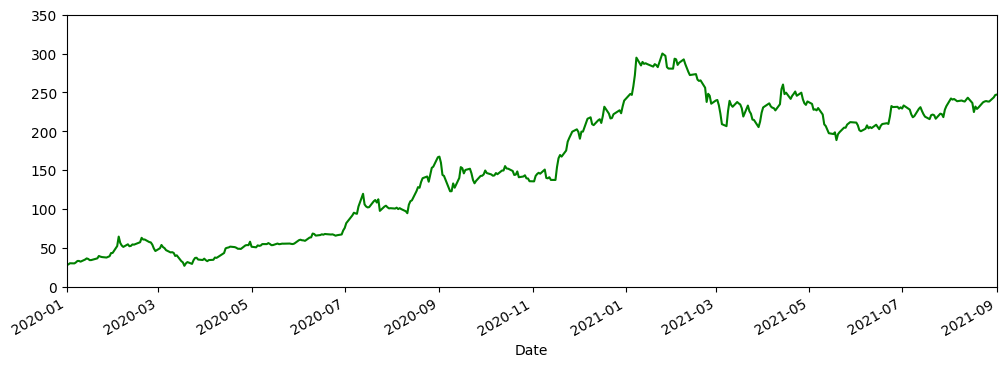

In [7]:
# xlimit and ylimit and coloring
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,350], figsize=(12,4), c='green')

In [8]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-08-14', '2023-08-15', '2023-08-16', '2023-08-17',
               '2023-08-18', '2023-08-21', '2023-08-22', '2023-08-23',
               '2023-08-24', '2023-08-25'],
              dtype='datetime64[ns]', name='Date', length=3313, freq=None)

In [9]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

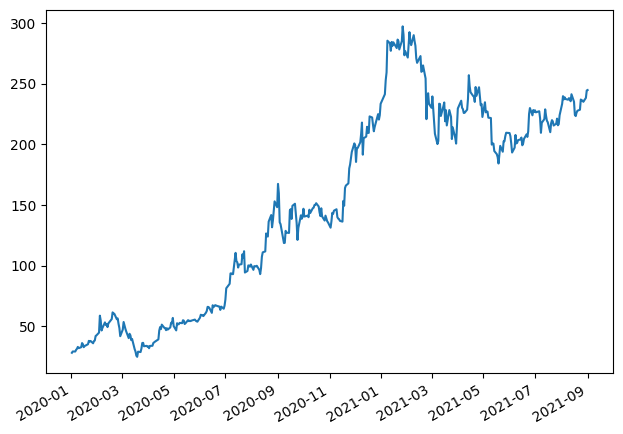

In [11]:
figure, axis = plt.subplots()
plt.tight_layout()
#preventing overlapping
figure.autofmt_xdate()
axis.plot(index, share_open)

Datetime index

In [12]:
df_tesla = df_tesla.reset_index()

In [13]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3313 non-null   datetime64[ns]
 1   Open       3313 non-null   float64       
 2   High       3313 non-null   float64       
 3   Low        3313 non-null   float64       
 4   Close      3313 non-null   float64       
 5   Adj Close  3313 non-null   float64       
 6   Volume     3313 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 181.3 KB


In [14]:
pd.to_datetime(df_tesla['Date'])

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3308   2023-08-21
3309   2023-08-22
3310   2023-08-23
3311   2023-08-24
3312   2023-08-25
Name: Date, Length: 3313, dtype: datetime64[ns]

In [15]:
df_tesla = df_tesla.set_index('Date', drop=True)

In [16]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


# Time Resampling

In [21]:
# get the min value for every end year using rule A "year end frequency"
df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


<Axes: xlabel='Date'>

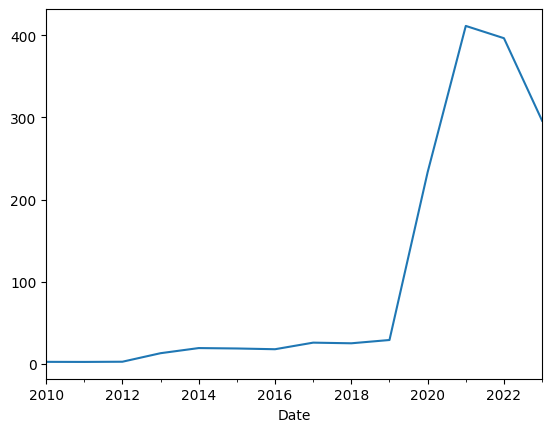

In [20]:
# get the max value for every end year using rule A
df_tesla.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

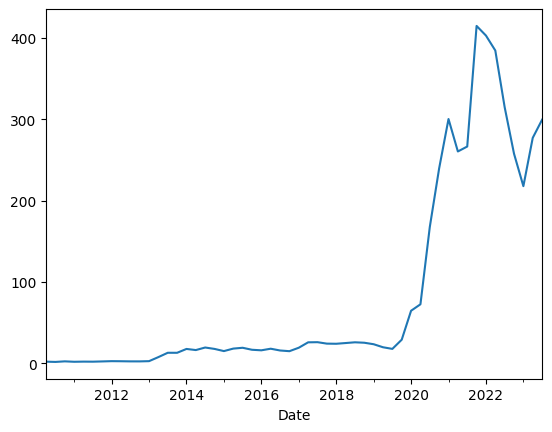

In [24]:
# for every quarter
df_tesla.resample(rule='QS').max()['High'].plot()


In [25]:
df_tesla['Open: 30 days rolling'] = df_tesla['Open'].rolling(30).mean()
df_tesla

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN
...,...,...,...,...,...,...,...
2023-08-21,221.550003,232.130005,220.580002,231.279999,231.279999,135702700,258.001666
2023-08-22,240.250000,240.820007,229.550003,233.190002,233.190002,130597900,257.055000
2023-08-23,229.339996,238.979996,229.289993,236.860001,236.860001,101077600,255.488667


<Axes: xlabel='Date'>

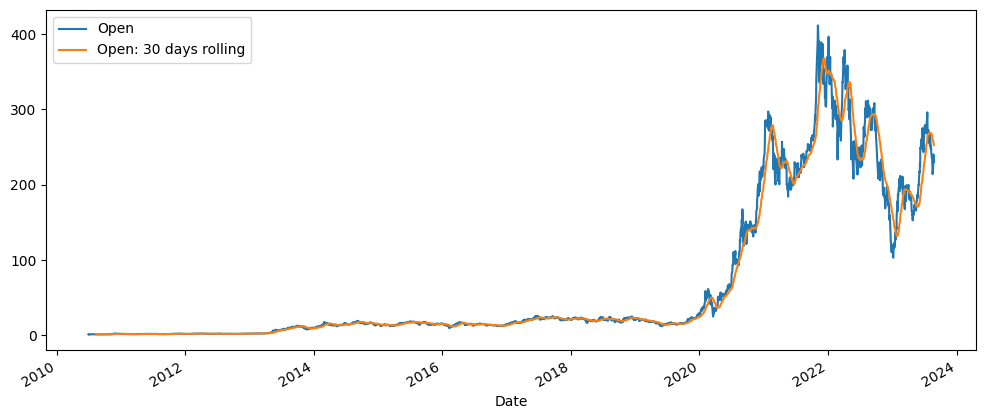

In [29]:
df_tesla[['Open','Open: 30 days rolling']].plot(figsize=(12,5))